# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import plotly as po
import plotly.express as px
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
po.offline.init_notebook_mode(connected=True)

## **Loading the dataset**

In [ ]:
data = pd.read_csv("/content/CardiacPrediction.csv")
data.head()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         37079 non-null  int64  
 1   Gender                       37079 non-null  int64  
 2   Age                          37079 non-null  int64  
 3   Annual-Family-Income         37079 non-null  int64  
 4   Ratio-Family-Income-Poverty  37079 non-null  float64
 5   X60-sec-pulse                37079 non-null  int64  
 6   Systolic                     37079 non-null  int64  
 7   Diastolic                    37079 non-null  int64  
 8   Weight                       37079 non-null  float64
 9   Height                       37079 non-null  float64
 10  Body-Mass-Index              37079 non-null  float64
 11  White-Blood-Cells            37079 non-null  float64
 12  Lymphocyte                   37079 non-null  float64
 13  Monocyte        

In [ ]:
data.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [ ]:
data.describe()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,48901.041236,1.513282,48.943661,7.358208,2.559026,72.579250,124.090078,69.919253,80.988276,167.389601,...,5.081713,1.370344,5.676496,1.783840,1.598856,1.218587,1.907333,1.549502,1.796165,0.040670
std,26753.636441,0.499830,18.010440,3.994083,1.624789,12.242108,19.254741,13.575804,20.678734,10.122908,...,1.072682,0.415985,1.050223,0.448324,0.511199,0.461102,0.349674,0.497550,0.402853,0.197527
min,2.000000,1.000000,20.000000,1.000000,0.000000,32.000000,0.000000,0.000000,32.300000,129.700000,...,1.530000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26120.500000,1.000000,33.000000,4.000000,1.140000,64.000000,111.000000,62.000000,66.500000,160.000000,...,4.320000,1.070000,5.200000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,50065.000000,2.000000,48.000000,7.000000,2.180000,72.000000,121.000000,70.000000,78.200000,167.100000,...,5.020000,1.290000,5.400000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
75%,71173.500000,2.000000,63.000000,10.000000,4.130000,80.000000,134.000000,78.000000,92.100000,174.600000,...,5.740000,1.600000,5.800000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
max,93702.000000,2.000000,85.000000,15.000000,5.000000,224.000000,270.000000,132.000000,371.000000,204.500000,...,14.090000,5.840000,18.800000,3.000000,3.000000,9.000000,3.000000,2.000000,2.000000,1.000000


In [ ]:
# Calculate null counts in each column
null_counts = data.isnull().sum()

# Calculate null percentage in each column
total_rows = len(data)
null_percentage = (null_counts / total_rows) * 100

# Print null counts and percentages as a table
print("Column Name                    | Null Count  | Null Percentage")
print("-" * 60)

for column in data.columns:
    print(f"{column:<30} | {null_counts[column]:<11} | {null_percentage[column]:.2f}%")

Column Name                    | Null Count  | Null Percentage
------------------------------------------------------------
SEQN                           | 0           | 0.00%
Gender                         | 0           | 0.00%
Age                            | 0           | 0.00%
Annual-Family-Income           | 0           | 0.00%
Ratio-Family-Income-Poverty    | 0           | 0.00%
X60-sec-pulse                  | 0           | 0.00%
Systolic                       | 0           | 0.00%
Diastolic                      | 0           | 0.00%
Weight                         | 0           | 0.00%
Height                         | 0           | 0.00%
Body-Mass-Index                | 0           | 0.00%
White-Blood-Cells              | 0           | 0.00%
Lymphocyte                     | 0           | 0.00%
Monocyte                       | 0           | 0.00%
Eosinophils                    | 0           | 0.00%
Basophils                      | 0           | 0.00%
Red-Blood-Cells             

In [ ]:
# Calculate the number of distinct values in each column
distinct_counts = data.nunique()

# Print the number of distinct values and distinct values in each column
print("Column Name                    | Distinct Count ")
print("-" * 50)

for column in data.columns:
    distinct_values = data[column].unique()
    print(f"{column:<30} | {distinct_counts[column]:<14}")

Column Name                    | Distinct Count 
--------------------------------------------------
SEQN                           | 37079         
Gender                         | 2             
Age                            | 66            
Annual-Family-Income           | 13            
Ratio-Family-Income-Poverty    | 501           
X60-sec-pulse                  | 60            
Systolic                       | 154           
Diastolic                      | 114           
Weight                         | 1432          
Height                         | 627           
Body-Mass-Index                | 3235          
White-Blood-Cells              | 212           
Lymphocyte                     | 610           
Monocyte                       | 218           
Eosinophils                    | 218           
Basophils                      | 70            
Red-Blood-Cells                | 404           
Hemoglobin                     | 131           
Mean-Cell-Vol                  | 538

In [ ]:
data[data['Gender']==1].count()

,0
SEQN,18047
Gender,18047
Age,18047
Annual-Family-Income,18047
Ratio-Family-Income-Poverty,18047
X60-sec-pulse,18047
Systolic,18047
Diastolic,18047
Weight,18047
Height,18047


In [ ]:
data[data['Gender']==2].count()

,0
SEQN,19032
Gender,19032
Age,19032
Annual-Family-Income,19032
Ratio-Family-Income-Poverty,19032
X60-sec-pulse,19032
Systolic,19032
Diastolic,19032
Weight,19032
Height,19032


In [ ]:
data['Gender'].value_counts()

,count
Gender,
2,19032
1,18047


In [ ]:
data['CoronaryHeartDisease'].value_counts()

,count
CoronaryHeartDisease,
0,35571
1,1508


# **Balancinng the data using SMOTE**

In [ ]:
X = data.drop('CoronaryHeartDisease', axis=1) #features
y = data['CoronaryHeartDisease']  #target variable

# the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('under_sampler', RandomUnderSampler(sampling_strategy=0.10, random_state=42)),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42))
])

X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='CoronaryHeartDisease')], axis=1)

In [ ]:
resampled_data.head()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,61989,1,46,10,2.71,64,114,74,102.1,185.5,...,5.84,1.71,5.3,1,1,1,2,2,2,0
1,47788,2,75,7,2.56,58,120,70,69.5,165.6,...,3.62,1.32,5.1,2,2,1,2,1,2,0
2,68910,1,74,7,1.70,76,138,80,86.2,170.4,...,4.03,0.83,5.9,2,2,1,2,2,2,0
3,24195,2,46,11,4.18,74,122,85,90.1,178.9,...,6.75,1.34,5.1,2,2,1,2,2,1,0
4,52532,1,80,7,2.40,82,92,56,88.3,181.9,...,3.39,1.71,6.4,2,2,1,1,1,2,0


In [ ]:
resampled_data.shape

(30160, 51)

In [ ]:
resampled_data['CoronaryHeartDisease'].value_counts()

,count
CoronaryHeartDisease,
0,15080
1,15080


In [ ]:
resampled_data.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

## **Feature Selection**

In [ ]:
X = resampled_data.drop(columns=['CoronaryHeartDisease', 'SEQN','Health-Insurance','Cholesterol'])  # Features
y = resampled_data['CoronaryHeartDisease']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SelectKBest
k_best_selector = SelectKBest(chi2, k=30)
X_train_k_best = k_best_selector.fit_transform(X_train, y_train)
selected_features = X.columns[k_best_selector.get_support()]

# RandomForestClassifier for further feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_k_best, y_train)

# Display feature importance scores
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=selected_features,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Selected Features:")
print(selected_features)
print("\nFeature Importance Scores:")
print(feature_importances)

Selected Features:
Index(['Gender', 'Age', 'Annual-Family-Income', 'X60-sec-pulse', 'Systolic',
       'Diastolic', 'Weight', 'Lymphocyte', 'Monocyte', 'Eosinophils',
       'Mean-Cell-Vol', 'Platelet-count', 'Segmented-Neutrophils', 'Albumin',
       'ALP', 'ALT', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Bilirubin', 'Uric.Acid', 'Triglycerides', 'Total-Cholesterol',
       'Glycohemoglobin', 'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes',
       'Blood-Rel-Stroke'],
      dtype='object')

Feature Importance Scores:
                       importance
Age                      0.205972
Gender                   0.094800
Diabetes                 0.066087
Creatinine               0.048159
Glycohemoglobin          0.045138
Glucose                  0.033609
Total-Cholesterol        0.030954
Blood-Rel-Stroke         0.029520
Diastolic                0.027677
Triglycerides            0.026348
Albumin                  0.025268
X60-sec-pulse            0.023563
Uric.Acid          

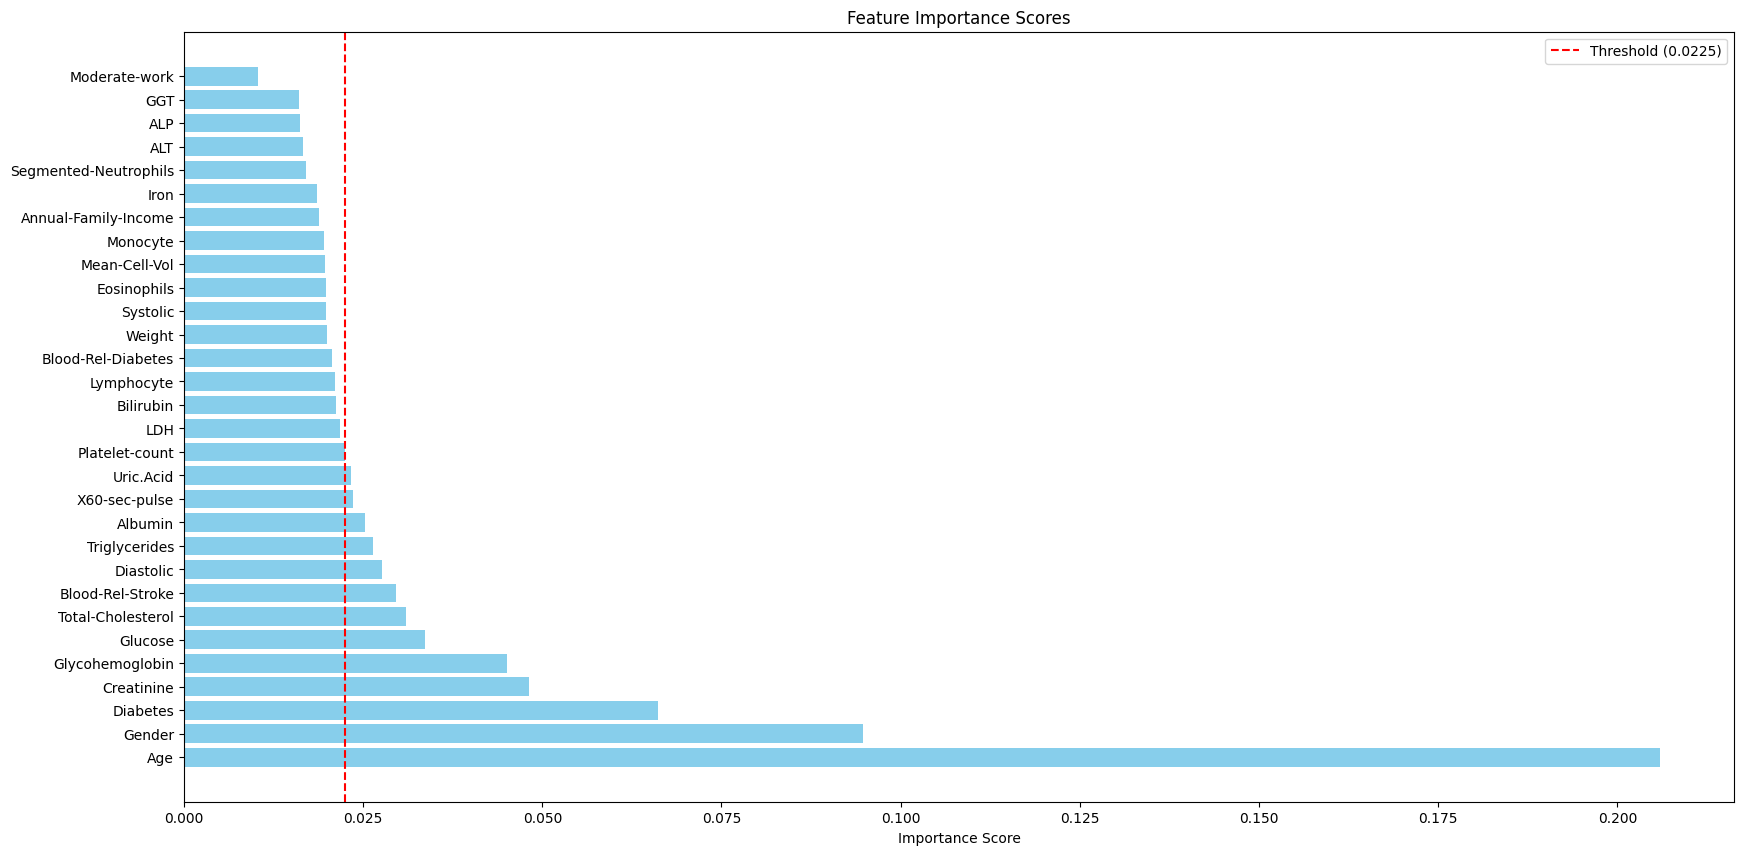

In [ ]:
# Visualize feature importance with a red line indicating the threshold
threshold = 0.0225 # Adjust the threshold as needed
plt.figure(figsize=(20, 10))
ax = plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.legend()
plt.show()

In [ ]:
# Print features above the threshold line
selected_features_above_threshold = feature_importances[feature_importances['importance'] > threshold].index
print("\nFeatures Above the Threshold:")
print(selected_features_above_threshold)
print(len(selected_features_above_threshold))


Features Above the Threshold:
Index(['Age', 'Gender', 'Diabetes', 'Creatinine', 'Glycohemoglobin', 'Glucose',
       'Total-Cholesterol', 'Blood-Rel-Stroke', 'Diastolic', 'Triglycerides',
       'Albumin', 'X60-sec-pulse', 'Uric.Acid'],
      dtype='object')
13


In [ ]:
features=list(selected_features_above_threshold)
print(features)
features.append('CoronaryHeartDisease')
final_data=data[features]
final_data.head()

['Age', 'Gender', 'Diabetes', 'Creatinine', 'Glycohemoglobin', 'Glucose', 'Total-Cholesterol', 'Blood-Rel-Stroke', 'Diastolic', 'Triglycerides', 'Albumin', 'X60-sec-pulse', 'Uric.Acid']


,Age,Gender,Diabetes,Creatinine,Glycohemoglobin,Glucose,Total-Cholesterol,Blood-Rel-Stroke,Diastolic,Triglycerides,Albumin,X60-sec-pulse,Uric.Acid,CoronaryHeartDisease
0,77,1,2,61.9,4.7,4.330,5.56,2,56,1.298,45,68,362.8,0
1,49,1,2,70.7,5.5,5.273,7.21,2,83,3.850,45,66,404.5,0
2,37,1,2,88.4,5.2,4.163,4.03,1,99,1.581,47,64,339.0,0
3,70,1,1,61.9,7.6,7.882,8.12,2,66,3.635,40,102,410.4,0
4,81,1,2,88.4,5.8,6.384,4.50,2,61,0.756,45,72,368.8,0


## **Data Analysis**

<Axes: xlabel='Age', ylabel='Count'>

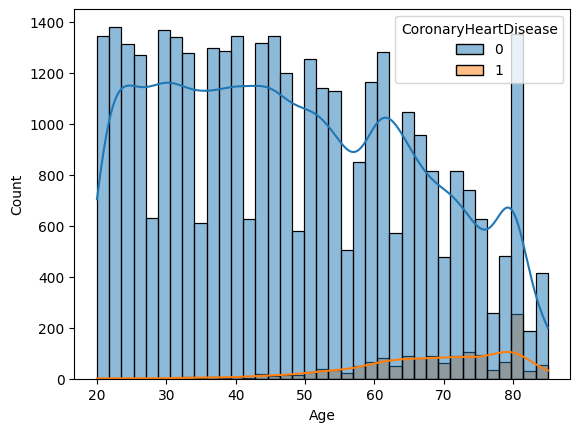

In [ ]:
sns.histplot(data=data, x='Age',hue='CoronaryHeartDisease',kde=True)

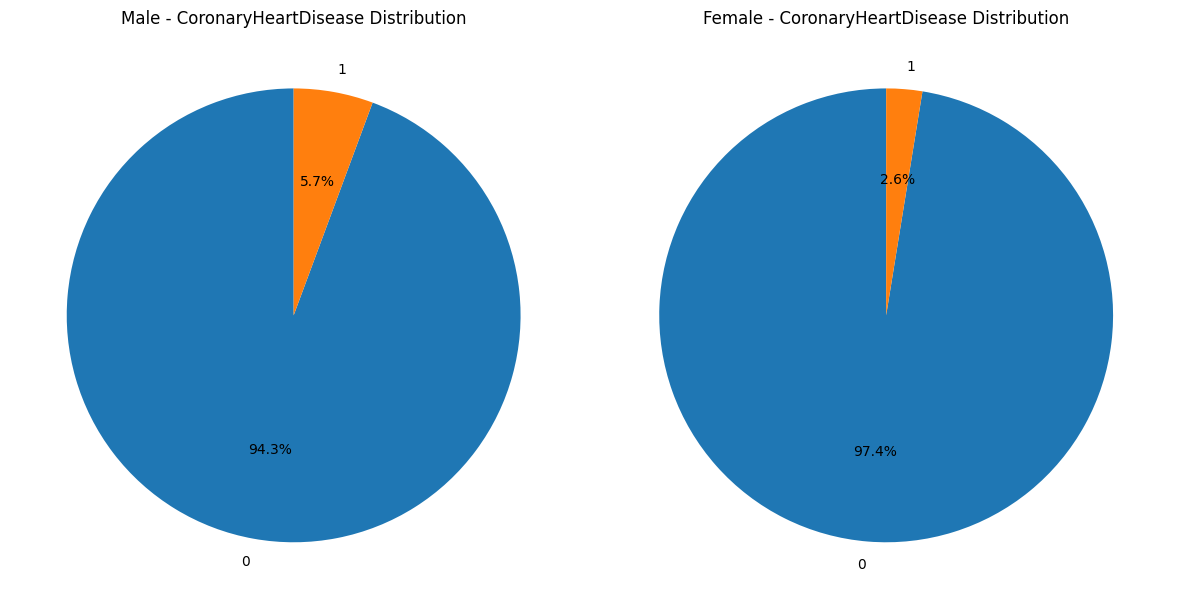

In [ ]:
male_data = data[data['Gender'] == 1]
female_data = data[data['Gender'] == 2]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for Male data
male_counts = male_data['CoronaryHeartDisease'].value_counts()
axes[0].pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Male - CoronaryHeartDisease Distribution')

# Plot pie chart for Female data
female_counts = female_data['CoronaryHeartDisease'].value_counts()
axes[1].pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Female - CoronaryHeartDisease Distribution')

plt.tight_layout()
plt.show()

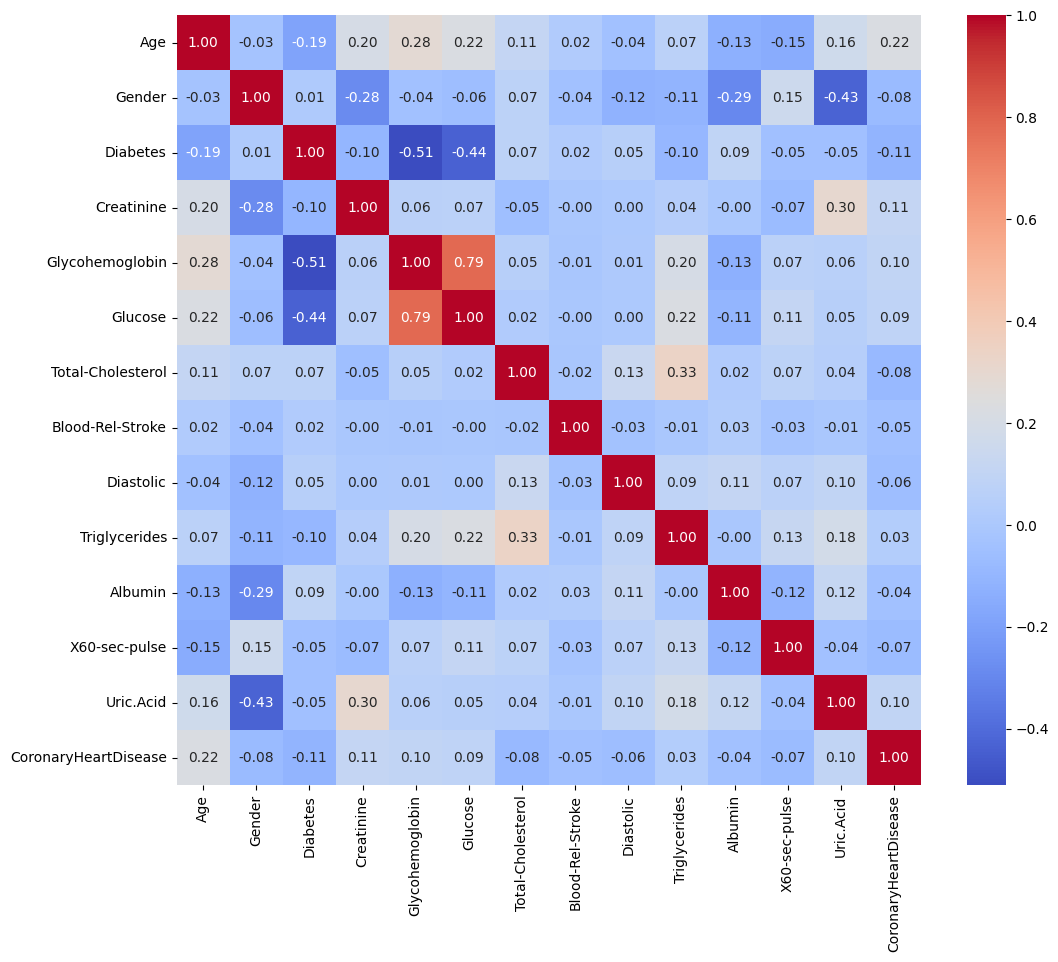

In [ ]:
features = ['Age', 'Gender', 'Diabetes', 'Creatinine', 'Glycohemoglobin', 'Glucose',
            'Total-Cholesterol', 'Blood-Rel-Stroke', 'Diastolic', 'Triglycerides',
            'Albumin', 'X60-sec-pulse', 'Uric.Acid', 'CoronaryHeartDisease']

# Create a correlation matrix
corr_matrix = final_data.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.show()

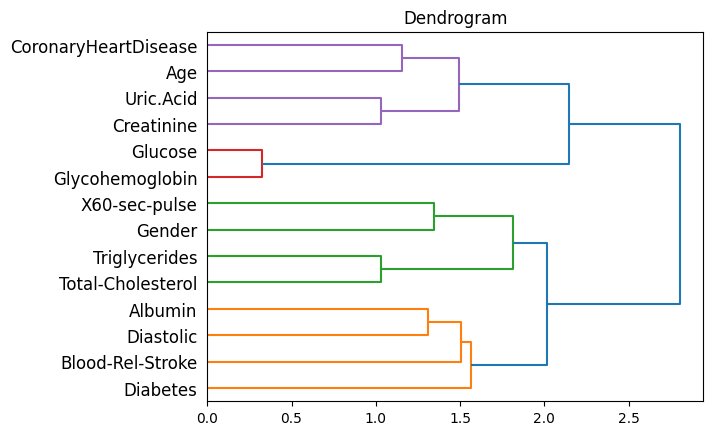

In [ ]:
features = ['Age', 'Gender', 'Diabetes', 'Creatinine', 'Glycohemoglobin', 'Glucose',
            'Total-Cholesterol', 'Blood-Rel-Stroke', 'Diastolic', 'Triglycerides',
            'Albumin', 'X60-sec-pulse', 'Uric.Acid']

corr_matrix = final_data.corr()
dendrogram = sch.dendrogram(sch.linkage(corr_matrix, method='ward'), labels=corr_matrix.columns, orientation='right')

plt.title('Dendrogram')
plt.show()

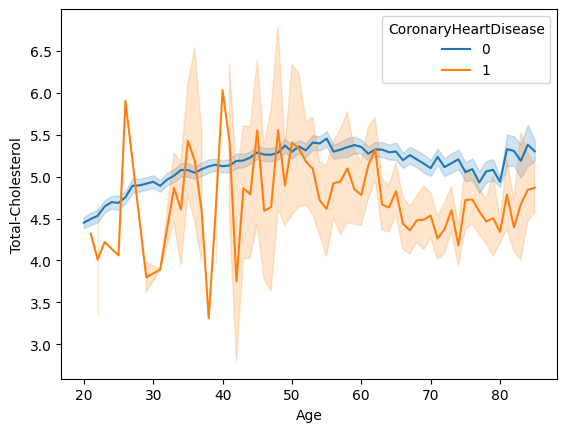

In [ ]:
# Line Plot
sns.lineplot(x='Age', y='Total-Cholesterol', hue='CoronaryHeartDisease', data=final_data)
plt.show()

# **Hypothesis Testing**

Hypothesis 1 (T-Test):

Null Hypothesis (H0): The mean age of individuals with CoronaryHeartDisease is equal to the mean age of individuals without CoronaryHeartDisease.

Alternative Hypothesis (H1): The mean age of individuals with CoronaryHeartDisease is different from the mean age of individuals without CoronaryHeartDisease.

Test: Independent samples t-test comparing the age distribution between the two groups.

In [ ]:
# Hypothesis 1: T-Test for Age
alpha = 0.05
age_with_disease = data.loc[data['CoronaryHeartDisease'] == 1, 'Age']
age_without_disease = data.loc[data['CoronaryHeartDisease'] == 0, 'Age']

t_stat_age, p_value_age = stats.ttest_ind(age_with_disease, age_without_disease)

if p_value_age < alpha:
    print("Hypothesis 1 Result: Reject the null hypothesis. The mean age is significantly different between individuals with and without CoronaryHeartDisease.")
else:
    print("Hypothesis 1 Result: Fail to reject the null hypothesis. There is no significant difference in mean age between individuals with and without CoronaryHeartDisease.")




Hypothesis 1 Result: Reject the null hypothesis. The mean age is significantly different between individuals with and without CoronaryHeartDisease.


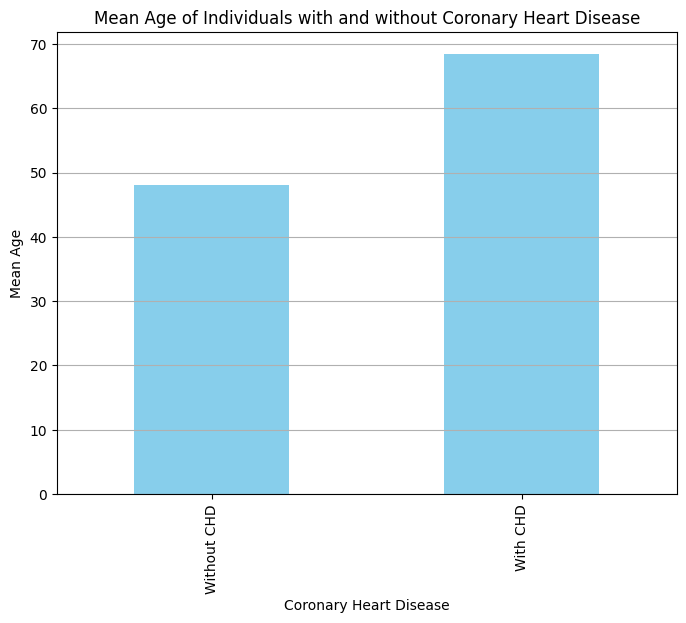

In [ ]:
mean_age_by_chd = final_data.groupby('CoronaryHeartDisease')['Age'].mean()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
mean_age_by_chd.plot(kind='bar', color='skyblue')
plt.title('Mean Age of Individuals with and without Coronary Heart Disease')
plt.xlabel('Coronary Heart Disease')
plt.ylabel('Mean Age')
plt.xticks(ticks=[0, 1], labels=['Without CHD', 'With CHD'])
plt.grid(axis='y')
plt.show()

Null Hypothesis (H0): The mean Glycohemoglobin level is equal in individuals with and without CoronaryHeartDisease.

Alternative Hypothesis (H1): The mean Glycohemoglobin level is different in individuals with and without CoronaryHeartDisease.

Test: Independent samples t-test comparing Glycohemoglobin levels between the two groups.

In [ ]:
# Hypothesis 2: T-Test for Glycohemoglobin
glycohemoglobin_with_disease = data.loc[data['CoronaryHeartDisease'] == 1, 'Glycohemoglobin']
glycohemoglobin_without_disease = data.loc[data['CoronaryHeartDisease'] == 0, 'Glycohemoglobin']

t_stat_glycohemoglobin, p_value_glycohemoglobin = stats.ttest_ind(glycohemoglobin_with_disease, glycohemoglobin_without_disease)

if p_value_glycohemoglobin < alpha:
    print("Hypothesis 2 Result: Reject the null hypothesis. The mean Glycohemoglobin level is significantly different between individuals with and without CoronaryHeartDisease.")
else:
    print("Hypothesis 2 Result: Fail to reject the null hypothesis. There is no significant difference in mean Glycohemoglobin level between individuals with and without CoronaryHeartDisease.")

Hypothesis 2 Result: Reject the null hypothesis. The mean Glycohemoglobin level is significantly different between individuals with and without CoronaryHeartDisease.


Hypothesis test for Pulse rate and Blood rel stroke

H0: Having a history of Coronary Heart disease does not have any affect on the pulse rate of people.

H_A: Having a history of Coronary Heart disease has an affect on the pulse rate of people.

In [ ]:
#Hypothesis 3: CHD and X60 pulse rate

import pandas as pd
from scipy.stats import mannwhitneyu

pulse_with_stroke = final_data[final_data['Blood-Rel-Stroke'] == 1]['X60-sec-pulse']
pulse_without_stroke = final_data[final_data['Blood-Rel-Stroke'] == 2]['X60-sec-pulse']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(pulse_with_stroke, pulse_without_stroke)

print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level (e.g., 0.05) to draw conclusions
if p_value<0.05:
  print("The Null Hypothesis is rejected, Having a history of Coronary Heart disease has an affect on the pulse rate of people.")
else:
  print("The Null Hypothesis is accepted, Having a history of Coronary Heart disease does not have an affect on the pulse rate of people.")

Mann-Whitney U Statistic: 115365137.5
P-value: 4.452551164503746e-06
The Null Hypothesis is rejected, Having a history of Coronary Heart disease has an affect on the pulse rate of people.


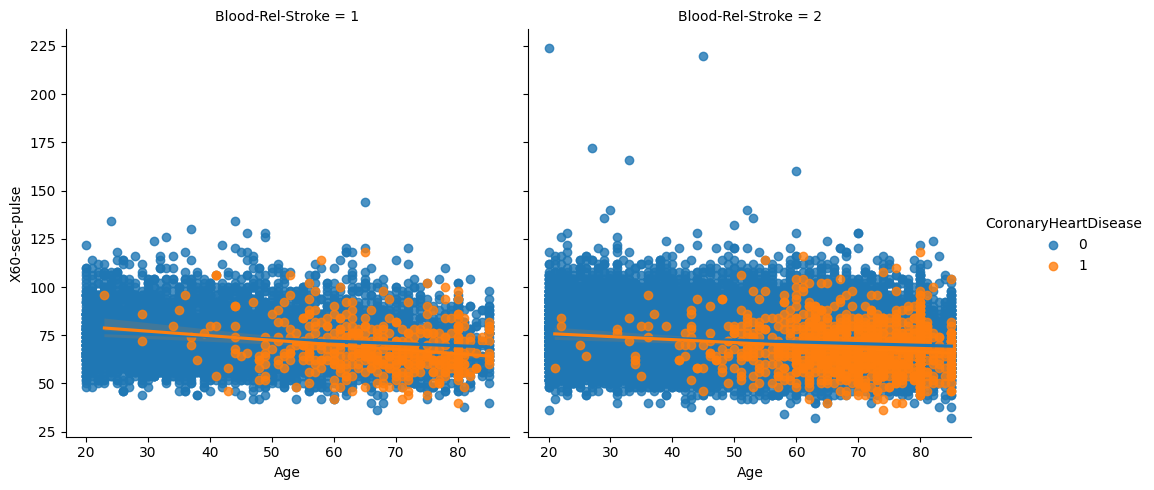

In [ ]:
sns.lmplot(data=final_data,x='Age',y='X60-sec-pulse',hue='CoronaryHeartDisease', col='Blood-Rel-Stroke',height=5)

Hypothesis about diabeties:

H0: The proportion of people suffering with CoronaryHeartDisease is same across all the 3 diabeties types.

H_A: The proportion of people suffering with CoronaryHeartDisease is higher with Diabeties type 2 patients than the rest.

In [ ]:
# Hypothesis 4: Chi2 test for Diabeties

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(final_data['Diabetes'], final_data['CoronaryHeartDisease'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Significance level (alpha)
alpha = 0.05

print(f'Chi-square Test for Independence between Diabetes Type and CoronaryHeartDisease:')
print(f'p-value = {p_value}')

# Check if the p-value is less than alpha to make a decision
if p_value < alpha:
    print('Reject the null hypothesis. There is evidence to suggest that the proportion of people suffering from CoronaryHeartDisease is different across diabetes types.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in the proportion of people suffering from CoronaryHeartDisease across diabetes types.')


Chi-square Test for Independence between Diabetes Type and CoronaryHeartDisease:
p-value = 1.665500066313612e-148
Reject the null hypothesis. There is evidence to suggest that the proportion of people suffering from CoronaryHeartDisease is different across diabetes types.


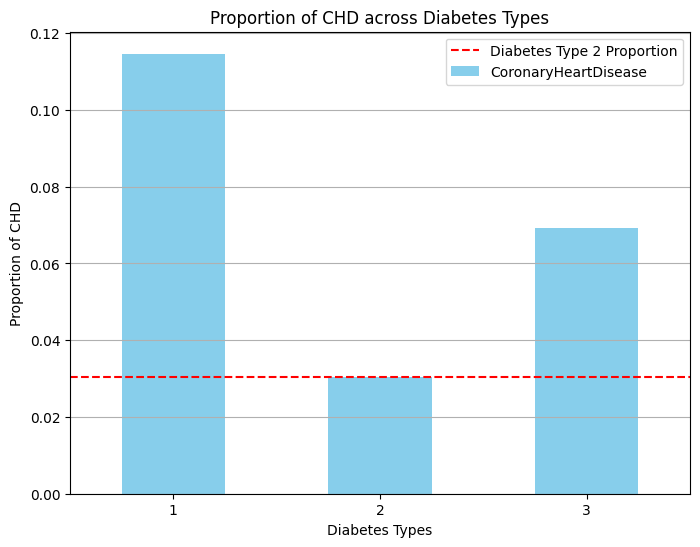

In [ ]:
# Calculate proportions of CHD occurrences for each type of Diabetes
proportions = final_data.groupby('Diabetes')['CoronaryHeartDisease'].mean()

# Plotting the proportions
plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of CHD across Diabetes Types')
plt.xlabel('Diabetes Types')
plt.ylabel('Proportion of CHD')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.axhline(proportions[2], color='red', linestyle='--', label='Diabetes Type 2 Proportion')
plt.legend()
plt.show()

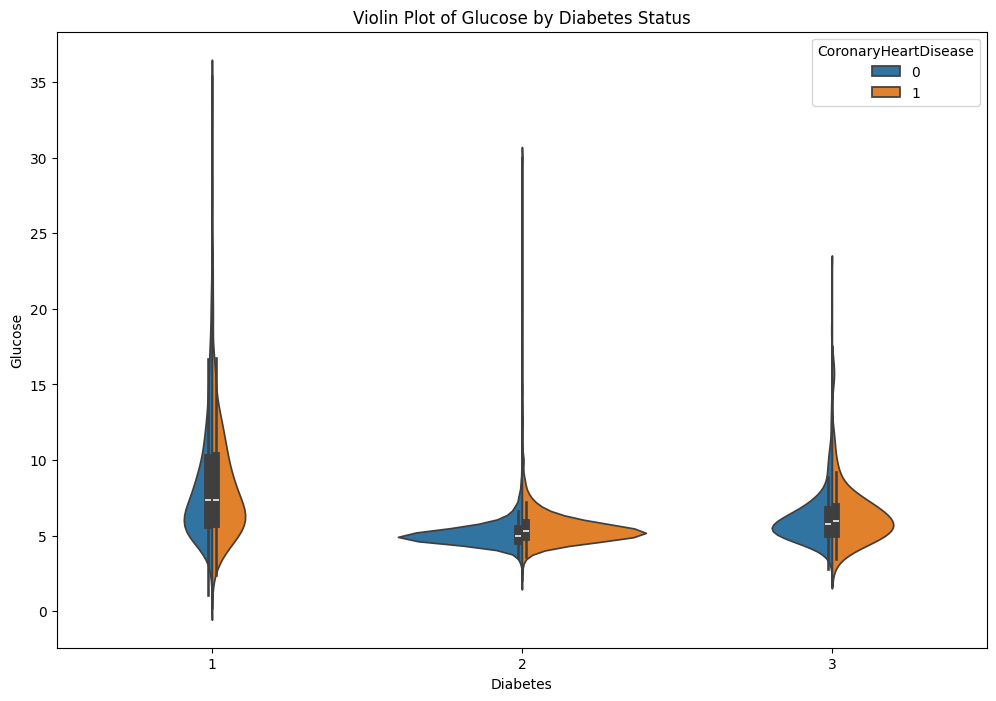

In [ ]:
# Violin Plot of Glucose by Diabetes Status
plt.figure(figsize=(12, 8))
sns.violinplot(x='Diabetes',hue='CoronaryHeartDisease', y='Glucose', data=final_data,legend=True,split=True)
plt.title('Violin Plot of Glucose by Diabetes Status')
plt.show()

ypothesis about X60 pulse rate and age:

H0: The pulse rate varies the same for people with and without Coronary Heart Disease.

H_A:  The pulse rate varies the rigorously for people with Coronary Heart Disease than people without any heart disease.

In [ ]:
#Hypothesis 5:

from scipy.stats import ttest_ind

group_with_CHD = data[data['CoronaryHeartDisease'] == 1]['X60-sec-pulse']
group_without_CHD = data[data['CoronaryHeartDisease'] == 0]['X60-sec-pulse']

# Perform the t-test
stat, p_value = ttest_ind(group_with_CHD, group_without_CHD, equal_var=False)

alpha = 0.05

print(f't-Test for X60 pulse rate and CoronaryHeartDisease:')
print(f'p-value = {p_value}')

# Check if the p-value is less than alpha to make a decision
if p_value < alpha:
    print('Reject the null hypothesis. There is evidence to suggest that the pulse rate varies rigorously for people with CoronaryHeartDisease than people without any heart disease.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in the variation of pulse rate between people with and without CoronaryHeartDisease.')


t-Test for X60 pulse rate and CoronaryHeartDisease:
p-value = 2.155744320482476e-41
Reject the null hypothesis. There is evidence to suggest that the pulse rate varies rigorously for people with CoronaryHeartDisease than people without any heart disease.


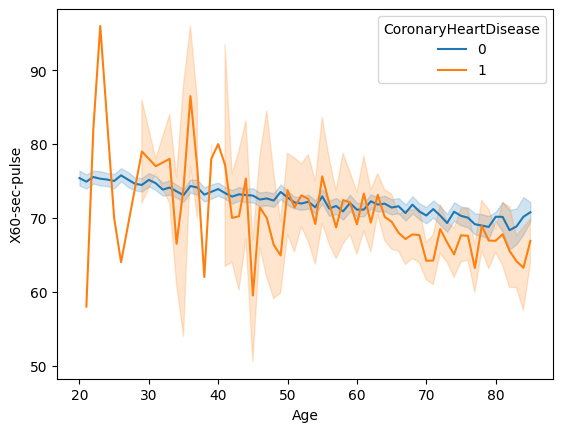

In [ ]:
# Line Plot
sns.lineplot(x='Age', y='X60-sec-pulse', hue='CoronaryHeartDisease', data=final_data)
plt.show()


In [ ]:
resampled_data.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [ ]:
selected_features_above_threshold

Index(['Age', 'Gender', 'Diabetes', 'Creatinine', 'Glycohemoglobin', 'Glucose',
       'Total-Cholesterol', 'Blood-Rel-Stroke', 'Diastolic', 'Triglycerides',
       'Albumin', 'X60-sec-pulse', 'Uric.Acid'],
      dtype='object')

In [ ]:
features=list(selected_features_above_threshold)
print(features)

['Age', 'Gender', 'Diabetes', 'Creatinine', 'Glycohemoglobin', 'Glucose', 'Total-Cholesterol', 'Blood-Rel-Stroke', 'Diastolic', 'Triglycerides', 'Albumin', 'X60-sec-pulse', 'Uric.Acid']


In [ ]:
features.append('CoronaryHeartDisease')
final_data=resampled_data[features]
final_data.head()

,Age,Gender,Diabetes,Creatinine,Glycohemoglobin,Glucose,Total-Cholesterol,Blood-Rel-Stroke,Diastolic,Triglycerides,Albumin,X60-sec-pulse,Uric.Acid,CoronaryHeartDisease
0,46,1,2,94.59,5.3,4.66,5.84,2,74,0.858,42,64,237.9,0
1,75,2,2,81.33,5.1,5.00,3.62,2,70,1.840,35,58,243.9,0
2,74,1,2,60.11,5.9,5.22,4.03,2,80,3.252,41,76,285.5,0
3,46,2,2,70.72,5.1,4.88,6.75,1,85,1.118,44,74,362.8,0
4,80,1,1,137.02,6.4,6.72,3.39,2,56,0.610,41,82,440.2,0


# **Model Training and Evaluation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



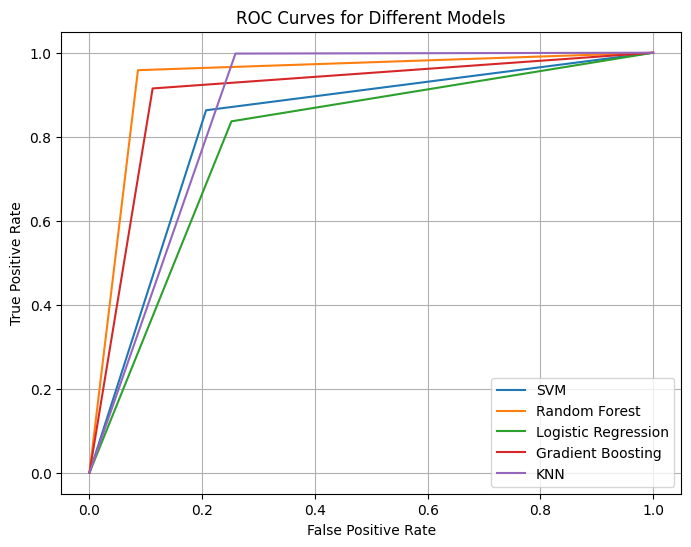

In [ ]:
X = resampled_data.drop('CoronaryHeartDisease', axis=1)
y = resampled_data['CoronaryHeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

models = [svm_model, rf_model, lr_model, gb_model, knn_model]
model_names = ['SVM', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'KNN']
accuracies = []
roc_auc_scores = []
f1_scores = []
auc_scores = []

plt.figure(figsize=(8, 6))

for model in models:
    if model == knn_model:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    f1 = f1_score(y_test, predictions)
    f1_scores.append(f1)

    auc = roc_auc_score(y_test, predictions)
    auc_scores.append(auc)

    fpr, tpr, _ = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label=model_names[models.index(model)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()

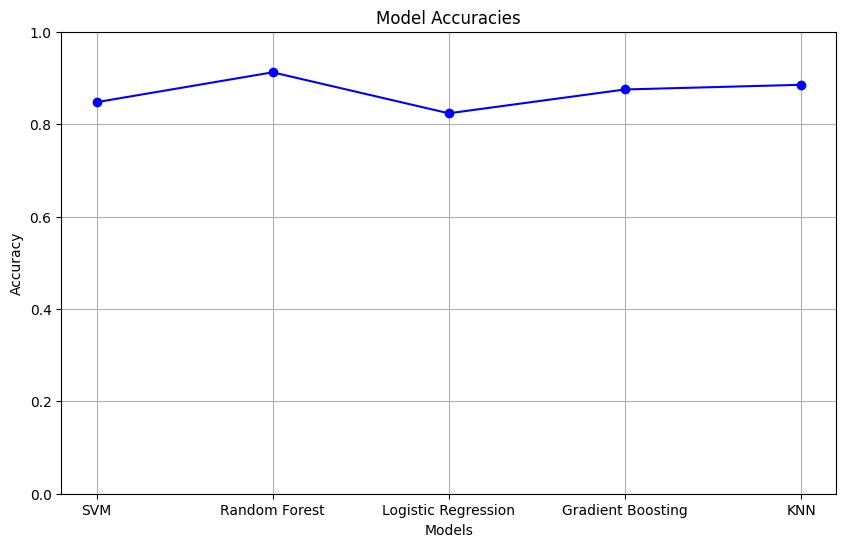

SVM - Accuracy: 0.8474801061007957
Random Forest - Accuracy: 0.9121352785145889
Logistic Regression - Accuracy: 0.8234416445623343
Gradient Boosting - Accuracy: 0.875
KNN - Accuracy: 0.8851127320954907


In [ ]:
# Line chart for accuracies
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

for i, model_name in enumerate(model_names):
    print(f'{model_name} - Accuracy: {accuracies[i]}')

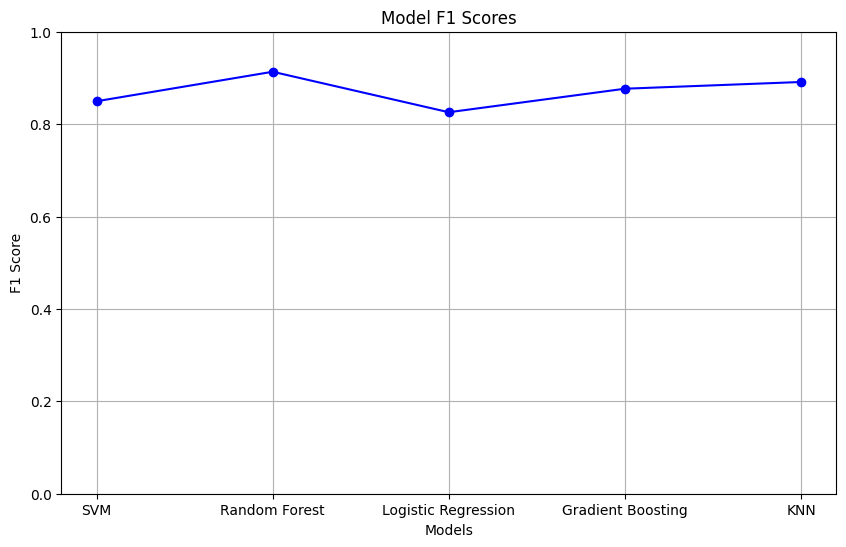

SVM - F1 score: 0.8494764397905759
Random Forest - F1 score: 0.9133420536298233
Logistic Regression - F1 score: 0.8257241040746195
Gradient Boosting - F1 score: 0.8766361256544503
KNN - F1 score: 0.8911917098445596


In [ ]:
# Line chart for F1 scores
plt.figure(figsize=(10, 6))
plt.plot(model_names, f1_scores, marker='o', linestyle='-', color='b')
plt.title('Model F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

for i, model_name in enumerate(model_names):
    print(f'{model_name} - F1 score: {f1_scores[i]}')